In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import plotly.graph_objs as go
import plotly.offline as py
from plotly.offline import iplot
import matplotlib.ticker as mtick
#plt.style.use("fivethirtyeight")
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.model_selection import train_test_split

In [2]:
# Just for disabling warning masseges
import warnings
warnings.filterwarnings('ignore')

In [3]:
# Importing zomato file in csv format
df1= pd.read_csv("C:/Users/Abhinav kumar/Desktop/zomato.csv")

In [4]:
# checking top 10 rows
df1.head(10)

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8/5,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7/5,88,+91 9620009302,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,https://www.zomato.com/bangalore/grand-village...,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8/5,166,+91 8026612447\r\n+91 9901210005,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari
5,https://www.zomato.com/bangalore/timepass-dinn...,"37, 5-1, 4th Floor, Bosco Court, Gandhi Bazaar...",Timepass Dinner,Yes,No,3.8/5,286,+91 9980040002\r\n+91 9980063005,Basavanagudi,Casual Dining,"Onion Rings, Pasta, Kadhai Paneer, Salads, Sal...",North Indian,600,"[('Rated 3.0', 'RATED\n Food 3/5\nAmbience 3/...",[],Buffet,Banashankari
6,https://www.zomato.com/bangalore/rosewood-inte...,"19/1, New Timberyard Layout, Beside Satellite ...",Rosewood International Hotel - Bar & Restaurant,No,No,3.6/5,8,+91 9731716688\r\n080 26740366,Mysore Road,Casual Dining,NaN,"North Indian, South Indian, Andhra, Chinese",800,"[('Rated 5.0', 'RATED\n Awesome food ??Great ...",[],Buffet,Banashankari
7,https://www.zomato.com/bangalore/onesta-banash...,"2469, 3rd Floor, 24th Cross, Opposite BDA Comp...",Onesta,Yes,Yes,4.6/5,2556,080 48653961\r\n080 48655715,Banashankari,"Casual Dining, Cafe","Farmhouse Pizza, Chocolate Banana, Virgin Moji...","Pizza, Cafe, Italian",600,"[('Rated 5.0', 'RATED\n I personally really l...",[],Cafes,Banashankari
8,https://www.zomato.com/bangalore/penthouse-caf...,"1, 30th Main Road, 3rd Stage, Banashankari, Ba...",Penthouse Cafe,Yes,No,4.0/5,324,+91 8884135549\r\n+91 9449449316,Banashankari,Cafe,"Pizza, Mocktails, Coffee, Nachos, Salad, Pasta...","Cafe, Italian, Continental",700,"[('Rated 3.0', ""RATED\n I had been to this pl...",[],Cafes,Banashankari
9,https://www.zomato.com/bangalore/smacznego-ban...,"2470, 21 Main Road, 25th Cross, Banashankari, ...",Smacznego,Yes,No,4.2/5,504,+91 9945230807\r\n+91 9743804471,Banashankari,Cafe,"Waffles, Pasta, Coleslaw Sandwich, Choco Waffl...","Cafe, Mexican, Italian, Momos, Beverages",550,"[('Rated 4.0', ""RATED\n Easy to locate\nVFM 3...",[],Cafes,Banashankari


In [5]:
# checking last 10 rows
df1.tail(10)

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
51707,https://www.zomato.com/bangalore/m-bar-bengalu...,"Bengaluru Marriott Hotel, 75, 8th Road, EPIP A...",M Bar - Bengaluru Marriott Hotel Whitefield,No,No,3.9 /5,77,080 49435000,Whitefield,"Fine Dining, Bar",Rooftop Ambience,Finger Food,"2,000","[('Rated 4.0', 'RATED\n Went there post dinne...",[],Pubs and bars,Whitefield
51708,https://www.zomato.com/bangalore/keys-cafe-key...,"Keys Hotel, 6, 1st Phase Industrial Area, Near...",Keys Cafe - Keys Hotel,No,No,2.8 /5,161,080 39451000\n+91 8884038484,Whitefield,"Casual Dining, Bar","Salads, Coffee, Breakfast Buffet, Halwa, Chick...","Chinese, Continental, North Indian","1,200","[('Rated 3.0', 'RATED\n Place is good not tha...",[],Pubs and bars,Whitefield
51709,https://www.zomato.com/bangalore/the-farm-hous...,"136, SAP Labs India, KIADB Export Promotion In...",The Farm House Bar n Grill,No,No,3.7 /5,34,+91 9980121279\n+91 9900240646,Whitefield,"Casual Dining, Bar",NaN,"North Indian, Continental",800,"[('Rated 4.0', 'RATED\n Ambience- Big and spa...",[],Pubs and bars,Whitefield
51710,https://www.zomato.com/bangalore/topsy-turvey-...,"2E2, 4th Cross Road, Devasandra Industrial Est...",Topsy Turvey,No,No,NaN,0,+91 9148155994,Whitefield,Bar,NaN,Finger Food,900,"[('Rated 4.0', ""RATED\n A divine joint for Fl...",[],Pubs and bars,Whitefield
51711,https://www.zomato.com/bangalore/bhagini-2-whi...,"139/C1, Next To GR Tech Park, Pattandur Agraha...",Bhagini,No,No,2.5 /5,81,080 65951222,Whitefield,"Casual Dining, Bar","Biryani, Andhra Meal","Andhra, South Indian, Chinese, North Indian",800,"[('Rated 4.0', 'RATED\n A fine place to chill...",[],Pubs and bars,Whitefield
51712,https://www.zomato.com/bangalore/best-brews-fo...,"Four Points by Sheraton Bengaluru, 43/3, White...",Best Brews - Four Points by Sheraton Bengaluru...,No,No,3.6 /5,27,080 40301477,Whitefield,Bar,NaN,Continental,"1,500","[('Rated 5.0', ""RATED\n Food and service are ...",[],Pubs and bars,Whitefield
51713,https://www.zomato.com/bangalore/vinod-bar-and...,"Number 10, Garudachar Palya, Mahadevapura, Whi...",Vinod Bar And Restaurant,No,No,NaN,0,+91 8197675843,Whitefield,Bar,NaN,Finger Food,600,[],[],Pubs and bars,Whitefield
51714,https://www.zomato.com/bangalore/plunge-sherat...,Sheraton Grand Bengaluru Whitefield Hotel & Co...,Plunge - Sheraton Grand Bengaluru Whitefield H...,No,No,NaN,0,NaN,Whitefield,Bar,NaN,Finger Food,"2,000",[],[],Pubs and bars,Whitefield
51715,https://www.zomato.com/bangalore/chime-sherato...,Sheraton Grand Bengaluru Whitefield Hotel & Co...,Chime - Sheraton Grand Bengaluru Whitefield Ho...,No,Yes,4.3 /5,236,080 49652769,"ITPL Main Road, Whitefield",Bar,"Cocktails, Pizza, Buttermilk",Finger Food,"2,500","[('Rated 4.0', 'RATED\n Nice and friendly pla...",[],Pubs and bars,Whitefield
51716,https://www.zomato.com/bangalore/the-nest-the-...,"ITPL Main Road, KIADB Export Promotion Industr...",The Nest - The Den Bengaluru,No,No,3.4 /5,13,+91 8071117272,"ITPL Main Road, Whitefield","Bar, Casual Dining",NaN,"Finger Food, North Indian, Continental","1,500","[('Rated 5.0', 'RATED\n Great ambience , look...",[],Pubs and bars,Whitefield


### column description

url                            url contains the link of the restaurent in zomato website
address                        address contains address of the restaurent in Bengaluru
name                           name contains name of the restaurent
online_order                   whether online ordering is available in the resturent or not
book_table                     table booking option is available or not
rate                           overall rating of the restaurent 
votes                          contains total no of ratings 
phone                          contains phone number of restaurent 
location                       contains nearby landmark location
rest_type                      type of the restaurent
dish_liked                     dishes liked by the customer
cuisines                       food style separated by comma
approx_cost(for two people)    approximate cost of the meal for two people
reviews_list                   list of tuples containing review of the restaurent
menu_item                      contains list of the menu available in the restaurent
listed_in(type)	               type of the meal
listed_in(city)                location neighbourhood in which restaurent is listed 

In [6]:
# checking shape of the dataframe
df1.shape

(51717, 17)

In [7]:
# checking the types of the features
df1.dtypes

url                            object
address                        object
name                           object
online_order                   object
book_table                     object
rate                           object
votes                           int64
phone                          object
location                       object
rest_type                      object
dish_liked                     object
cuisines                       object
approx_cost(for two people)    object
reviews_list                   object
menu_item                      object
listed_in(type)                object
listed_in(city)                object
dtype: object

In [8]:
## GETTING FEW MORE INFORMATION THROUGH THIS 
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51717 entries, 0 to 51716
Data columns (total 17 columns):
url                            51717 non-null object
address                        51717 non-null object
name                           51717 non-null object
online_order                   51717 non-null object
book_table                     51717 non-null object
rate                           43942 non-null object
votes                          51717 non-null int64
phone                          50509 non-null object
location                       51696 non-null object
rest_type                      51490 non-null object
dish_liked                     23639 non-null object
cuisines                       51672 non-null object
approx_cost(for two people)    51371 non-null object
reviews_list                   51717 non-null object
menu_item                      51717 non-null object
listed_in(type)                51717 non-null object
listed_in(city)                51717 non-nul

In [9]:
# checking for the total null value in any feature
df1.isnull().sum()

url                                0
address                            0
name                               0
online_order                       0
book_table                         0
rate                            7775
votes                              0
phone                           1208
location                          21
rest_type                        227
dish_liked                     28078
cuisines                          45
approx_cost(for two people)      346
reviews_list                       0
menu_item                          0
listed_in(type)                    0
listed_in(city)                    0
dtype: int64

In [10]:
# Group and aggregate duplicate restaurants that are listed under multiple types in listed_in(type)
#grouped = df1.groupby(["name", "address"]).agg({"listed_in(type)_x" : list})
#df = pd.merge(grouped, df1, on = (["name", "address"]))


In [11]:
#deleting unnecessary features
df=df1.drop(['url','phone'], axis=1)

In [12]:
#checking for duplicate rows
df.duplicated().sum()

43

In [13]:
df.drop_duplicates(inplace=True)

In [14]:
df.duplicated().sum()

0

In [15]:
# Drop rows which have duplicate information in "name", "address" and "listed_in(type)_x"
#df["listed_in(type)_x"] = df["listed_in(type)_x"].astype(str) 
# converting unhashable list to a hashable type
#df.drop_duplicates(subset = ["name", "address", "listed_in(type)_x"], inplace = True)

In [16]:
df.shape

(51674, 15)

### Drop null values

In [17]:
# Remove the NaN values from the dataset
df.dropna(how='any', inplace= True)
df.isnull().sum()

address                        0
name                           0
online_order                   0
book_table                     0
rate                           0
votes                          0
location                       0
rest_type                      0
dish_liked                     0
cuisines                       0
approx_cost(for two people)    0
reviews_list                   0
menu_item                      0
listed_in(type)                0
listed_in(city)                0
dtype: int64

In [18]:
df.shape

(23395, 15)

shape reduced from 51717 to 23248 dropping 28469 rows

In [19]:
df.columns

Index(['address', 'name', 'online_order', 'book_table', 'rate', 'votes',
       'location', 'rest_type', 'dish_liked', 'cuisines',
       'approx_cost(for two people)', 'reviews_list', 'menu_item',
       'listed_in(type)', 'listed_in(city)'],
      dtype='object')

In [20]:
# Renaming the column name
df=df.rename(columns={'approx_cost(for two people)':'cost',
                      'listed_in(type)':'type', 'listed_in(city)':'city'})
df.columns

Index(['address', 'name', 'online_order', 'book_table', 'rate', 'votes',
       'location', 'rest_type', 'dish_liked', 'cuisines', 'cost',
       'reviews_list', 'menu_item', 'type', 'city'],
      dtype='object')

In [21]:
df.head()

,address,name,online_order,book_table,rate,votes,location,rest_type,dish_liked,cuisines,cost,reviews_list,menu_item,type,city
0,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8/5,918,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7/5,88,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8/5,166,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari


### Data cleaning

In [22]:
# looking for all unique values in cost column
df['cost'].unique()

array(['800', '300', '600', '700', '550', '500', '450', '650', '400',
       '750', '200', '850', '1,200', '150', '350', '250', '1,500',
       '1,300', '1,000', '100', '900', '1,100', '1,600', '950', '230',
       '1,700', '1,400', '1,350', '2,200', '2,000', '1,800', '1,900',
       '180', '330', '2,500', '2,100', '3,000', '2,800', '3,400', '40',
       '1,250', '3,500', '4,000', '2,400', '1,450', '3,200', '6,000',
       '1,050', '4,100', '2,300', '120', '2,600', '5,000', '3,700',
       '1,650', '2,700', '4,500'], dtype=object)

In [23]:
# replacing the comma with nothing and making data in float
df['cost']= df['cost'].apply(lambda x: x.replace(",",""))

In [24]:
# no of unique values of cost
df['cost'].unique()

array(['800', '300', '600', '700', '550', '500', '450', '650', '400',
       '750', '200', '850', '1200', '150', '350', '250', '1500', '1300',
       '1000', '100', '900', '1100', '1600', '950', '230', '1700', '1400',
       '1350', '2200', '2000', '1800', '1900', '180', '330', '2500',
       '2100', '3000', '2800', '3400', '40', '1250', '3500', '4000',
       '2400', '1450', '3200', '6000', '1050', '4100', '2300', '120',
       '2600', '5000', '3700', '1650', '2700', '4500'], dtype=object)

In [25]:
# Changing the attribute type to float
df['cost']= df['cost'].astype(float)

In [26]:
df['cost'].unique()

array([ 800.,  300.,  600.,  700.,  550.,  500.,  450.,  650.,  400.,
        750.,  200.,  850., 1200.,  150.,  350.,  250., 1500., 1300.,
       1000.,  100.,  900., 1100., 1600.,  950.,  230., 1700., 1400.,
       1350., 2200., 2000., 1800., 1900.,  180.,  330., 2500., 2100.,
       3000., 2800., 3400.,   40., 1250., 3500., 4000., 2400., 1450.,
       3200., 6000., 1050., 4100., 2300.,  120., 2600., 5000., 3700.,
       1650., 2700., 4500.])

In [27]:
# checking for the type of the objects
df.dtypes

address          object
name             object
online_order     object
book_table       object
rate             object
votes             int64
location         object
rest_type        object
dish_liked       object
cuisines         object
cost            float64
reviews_list     object
menu_item        object
type             object
city             object
dtype: object

In [28]:
df['rate'].unique()

array(['4.1/5', '3.8/5', '3.7/5', '4.6/5', '4.0/5', '4.2/5', '3.9/5',
       '3.0/5', '3.6/5', '2.8/5', '4.4/5', '3.1/5', '4.3/5', '2.6/5',
       '3.3/5', '3.5/5', '3.8 /5', '3.2/5', '4.5/5', '2.5/5', '2.9/5',
       '3.4/5', '2.7/5', '4.7/5', 'NEW', '2.4/5', '2.2/5', '2.3/5',
       '4.8/5', '3.9 /5', '4.2 /5', '4.0 /5', '4.1 /5', '2.9 /5',
       '2.7 /5', '2.5 /5', '2.6 /5', '4.5 /5', '4.3 /5', '3.7 /5',
       '4.4 /5', '4.9/5', '2.1/5', '2.0/5', '1.8/5', '3.4 /5', '3.6 /5',
       '3.3 /5', '4.6 /5', '4.9 /5', '3.2 /5', '3.0 /5', '2.8 /5',
       '3.5 /5', '3.1 /5', '4.8 /5', '2.3 /5', '4.7 /5', '2.4 /5',
       '2.1 /5', '2.2 /5', '2.0 /5', '1.8 /5'], dtype=object)

In [29]:
# removing NEW 
df=df.loc[df.rate !='NEW']

In [30]:
df['rate'].unique()

array(['4.1/5', '3.8/5', '3.7/5', '4.6/5', '4.0/5', '4.2/5', '3.9/5',
       '3.0/5', '3.6/5', '2.8/5', '4.4/5', '3.1/5', '4.3/5', '2.6/5',
       '3.3/5', '3.5/5', '3.8 /5', '3.2/5', '4.5/5', '2.5/5', '2.9/5',
       '3.4/5', '2.7/5', '4.7/5', '2.4/5', '2.2/5', '2.3/5', '4.8/5',
       '3.9 /5', '4.2 /5', '4.0 /5', '4.1 /5', '2.9 /5', '2.7 /5',
       '2.5 /5', '2.6 /5', '4.5 /5', '4.3 /5', '3.7 /5', '4.4 /5',
       '4.9/5', '2.1/5', '2.0/5', '1.8/5', '3.4 /5', '3.6 /5', '3.3 /5',
       '4.6 /5', '4.9 /5', '3.2 /5', '3.0 /5', '2.8 /5', '3.5 /5',
       '3.1 /5', '4.8 /5', '2.3 /5', '4.7 /5', '2.4 /5', '2.1 /5',
       '2.2 /5', '2.0 /5', '1.8 /5'], dtype=object)

In [31]:
# romoving /5 that is (out of five) rating from rate
df['rate']=df['rate'].apply(lambda x: x.replace("/5",""))

In [32]:
df['rate'].unique()

array(['4.1', '3.8', '3.7', '4.6', '4.0', '4.2', '3.9', '3.0', '3.6',
       '2.8', '4.4', '3.1', '4.3', '2.6', '3.3', '3.5', '3.8 ', '3.2',
       '4.5', '2.5', '2.9', '3.4', '2.7', '4.7', '2.4', '2.2', '2.3',
       '4.8', '3.9 ', '4.2 ', '4.0 ', '4.1 ', '2.9 ', '2.7 ', '2.5 ',
       '2.6 ', '4.5 ', '4.3 ', '3.7 ', '4.4 ', '4.9', '2.1', '2.0', '1.8',
       '3.4 ', '3.6 ', '3.3 ', '4.6 ', '4.9 ', '3.2 ', '3.0 ', '2.8 ',
       '3.5 ', '3.1 ', '4.8 ', '2.3 ', '4.7 ', '2.4 ', '2.1 ', '2.2 ',
       '2.0 ', '1.8 '], dtype=object)

In [33]:
#converting it into float
df['rate']=df['rate'].astype(float)

In [34]:
# Examining restaurant types in the column "listed_in(type)"
df["type"].value_counts()

Delivery              10657
Dine-out               8006
Desserts               1364
Cafes                  1066
Drinks & nightlife      879
Buffet                  753
Pubs and bars           523
Name: type, dtype: int64

### Data Visualization

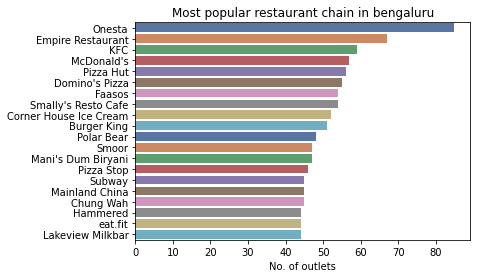

<Figure size 864x720 with 0 Axes>

In [35]:
# Most famous restaurent in Bengaluru
popularchain= df['name'].value_counts()[:20]
sns.barplot(x=popularchain, y=popularchain.index,palette='deep')
plt.title('Most popular restaurant chain in bengaluru')
plt.xlabel('No. of outlets')
plt.figure(figsize=(12,10))
plt.show()

### Whether restaurent offers table booking

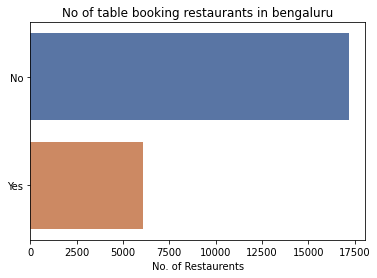

<Figure size 864x720 with 0 Axes>

In [36]:
tablebooking=df['book_table'].value_counts()
sns.barplot(x=tablebooking, y=tablebooking.index,palette='deep')
plt.title('No of table booking restaurants in bengaluru')
plt.xlabel('No. of Restaurents')
plt.figure(figsize=(12,10))
plt.show()

### Insite
Most of the restaurent does not provide table booking

In [37]:
# Converting the restaurant names to rownames 
df.index = df["name"]
# Identifying the top 10 cuisines in Bangalore?
pd.DataFrame(df.groupby(["cuisines"])["cuisines"].agg(['count']).sort_values("count", ascending = False)).head(10)

,count
cuisines,
North Indian,1152
"North Indian, Chinese",778
South Indian,366
Cafe,285
"South Indian, North Indian, Chinese",233
"Desserts, Beverages",216
"Bakery, Desserts",216
"Ice Cream, Desserts",212
Chinese,210


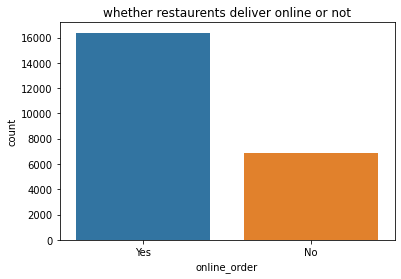

In [38]:
#whether restaurents deliver online or not
sns.countplot(df['online_order'])
fig=plt.gcf()
fig.set_size_inches(6,4)
plt.title("whether restaurents deliver online or not")
plt.show()

### Insite
Many restaurent offers online orders

### Rating distribution

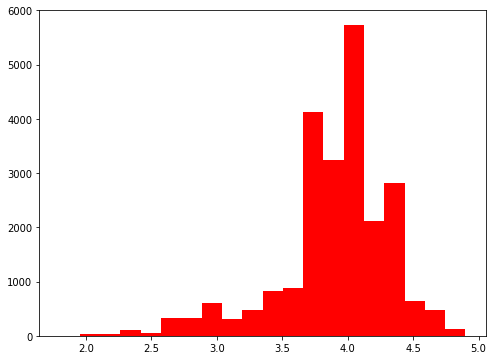

In [39]:
# Plotting the distribution of restaurant ratings
plt.figure(figsize = (8, 6))
plt.hist(df.rate, bins = 20, color = "r")
plt.show()

1. Almost more than 70 percent of restaurants has rating between 3 and 4.5
2. Restaurants having rating more than 4.5 are very rare.

In [40]:
# Printing restaurant value counts for the top 30 locations
df["location"].value_counts()[:30]

Koramangala 5th Block    1776
BTM                      1472
Indiranagar              1355
HSR                      1170
Jayanagar                1060
JP Nagar                  993
Whitefield                832
Koramangala 7th Block     736
Koramangala 6th Block     726
Marathahalli              681
Koramangala 4th Block     652
MG Road                   596
Brigade Road              568
Church Street             512
Bannerghatta Road         498
Ulsoor                    473
Bellandur                 471
Koramangala 1st Block     466
Kalyan Nagar              466
Sarjapur Road             453
Lavelle Road              444
Residency Road            441
Banashankari              387
Malleshwaram              372
Richmond Road             351
Cunningham Road           332
Electronic City           320
Brookefield               307
New BEL Road              306
St. Marks Road            304
Name: location, dtype: int64

In [41]:
# Top 10 locations with the highest ratings
(pd.DataFrame(df.groupby("location")["rate"].mean())).sort_values("rate", ascending = False).head(10)

,rate
location,
Lavelle Road,4.193243
Koramangala 5th Block,4.151351
Sankey Road,4.105882
Koramangala 3rd Block,4.100617
Cunningham Road,4.100301
St. Marks Road,4.099013
Koramangala 2nd Block,4.073333
Sadashiv Nagar,4.061538
Residency Road,4.051927


In [42]:
# Top 10 most expensive locations (cost = cost for two)
(pd.DataFrame(df.groupby("location")["cost"].mean())).sort_values("cost", ascending = False).head(10)


,cost
location,
Sankey Road,2802.941176
MG Road,1472.063758
Lavelle Road,1426.238739
Race Course Road,1284.000000
Infantry Road,1186.170213
Richmond Road,1124.786325
Residency Road,1093.197279
Ulsoor,1069.767442
Langford Town,1000.000000


### count of restaurents from rating 1 to 2, 2 to 3, 3 to 4, 4 to 5

In [43]:
df['rate'].unique()

array([4.1, 3.8, 3.7, 4.6, 4. , 4.2, 3.9, 3. , 3.6, 2.8, 4.4, 3.1, 4.3,
       2.6, 3.3, 3.5, 3.2, 4.5, 2.5, 2.9, 3.4, 2.7, 4.7, 2.4, 2.2, 2.3,
       4.8, 4.9, 2.1, 2. , 1.8])

In [44]:
df['rate'].min()

1.8

In [45]:
df['rate'].max()

4.9

In [46]:
df['rate']=df['rate'].astype(float)

In [47]:
((df['rate']>=1) & (df['rate']<2)).sum()

5

In [48]:
((df['rate']>=2) & (df['rate']<3)).sum()

1179

In [49]:
((df['rate']>=3) & (df['rate']<4)).sum()

10153

In [50]:
#((df['rate']>=4) & (df['rate']<4.5)).sum()
# 10675

In [51]:
((df['rate']>=4.5) & (df['rate']<5)).sum()

1236

In [52]:
autopct='%1.0f%%'

### plotting the rating counts with pie chart

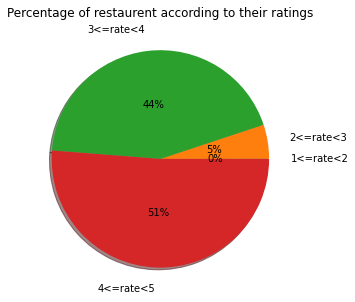

In [53]:
slices=[((df['rate']>=1) & (df['rate']<2)).sum(),
        ((df['rate']>=2) & (df['rate']<3)).sum(),
        ((df['rate']>=3) & (df['rate']<4)).sum(),
        ((df['rate']>=4) & (df['rate']<5)).sum()]
labels=['1<=rate<2','2<=rate<3','3<=rate<4','4<=rate<5']
plt.pie(slices,labels=labels, autopct='%1.0f%%',pctdistance=0.5,labeldistance=1.2,shadow=True)
fig=plt.gcf()
plt.title("Percentage of restaurent according to their ratings")
fig.set_size_inches(5,5)
plt.show()

### Service types

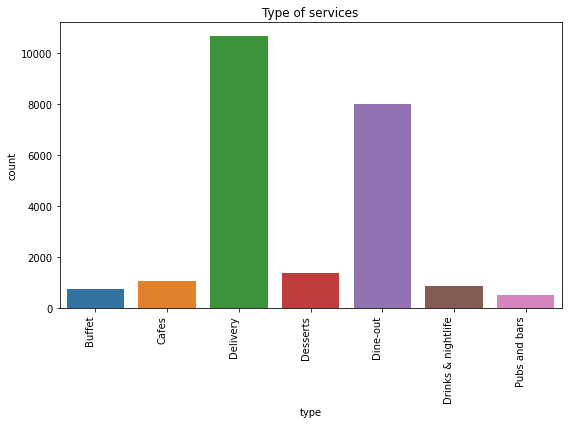

In [54]:
sns.countplot(df['type']).set_xticklabels(sns.countplot(df['type']).get_xticklabels(),
                                           rotation=90,ha="right")
fig=plt.gcf()
fig.set_size_inches(8,6)
plt.title("Type of services")
plt.tight_layout()

### Insite
The two most frequent services are Delivery and Dine-out 

### Distribution of Charges(cost per two person)

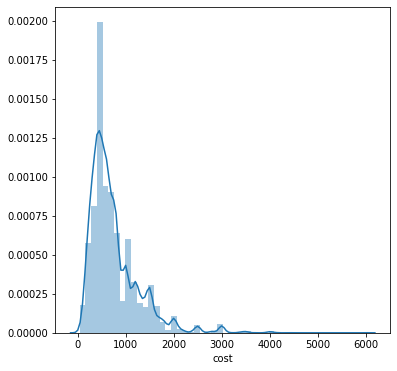

In [55]:
plt.figure(figsize=(6,6))
sns.distplot(df['cost'])
plt.show()

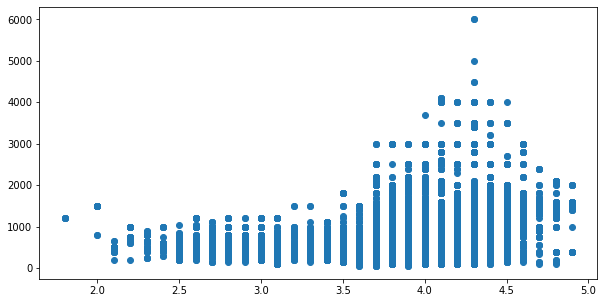

In [56]:
# Visualizing the relationship between rating and cost
plt.figure(figsize = (10, 5))
plt.scatter(df.rate, df.cost)
plt.show()

Maximum cost is in restaurents having ratings between 3.7 to 4.7. Surprisingly the highest cost is in 4.4(approx) rated restaurent and restaurent rated nearly 4.9 has far less cost

In [57]:
# re=regular expression used for splitting words
import re
df.index=range(df.shape[0])
likes=[]
for i in range(df.shape[0]):
    array_split=re.split(',', df['dish_liked'][i])
    for item in array_split:
        likes.append(item)


In [58]:
df.index=range(df.shape[0])

In [59]:
df.index

RangeIndex(start=0, stop=23248, step=1)

In [60]:
print("count of most liked Dishes in Bangalore")
favourite_food=pd.Series(likes).value_counts()
favourite_food.head(40)

count of most liked Dishes in Bangalore


 Pasta               2692
 Pizza               1915
 Cocktails           1880
 Burgers             1736
 Mocktails           1623
 Biryani             1307
 Sandwiches          1287
Burgers              1256
 Coffee              1184
 Nachos              1170
 Fish                1116
 Paratha             1107
 Salads              1055
 Chicken Biryani     1004
Cocktails             891
 Fries                876
 Noodles              854
 Beer                 835
 Mutton Biryani       832
 Tea                  819
Coffee                801
 Sandwich             788
 Butter Chicken       782
 Thali                770
Biryani               749
Pizza                 747
 Roti                 729
 Brownie              726
 Salad                677
 Hot Chocolate        672
 Momos                658
Pasta                 657
 Chicken Curry        640
 Dal Makhani          633
 Chaat                611
 Tandoori Chicken     593
 Waffles              589
 Sea Food             566
 Tiramisu   

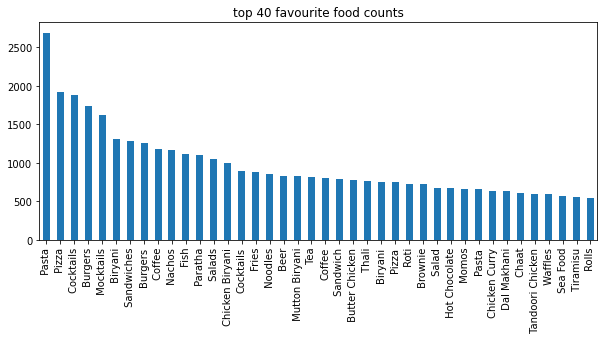

In [61]:
ax=favourite_food.nlargest(n=40,keep='first').plot(kind='bar',figsize=(10,4), title="top 40 favourite food counts")

### Resturants and their counts

Text(0.5, 0, 'count')

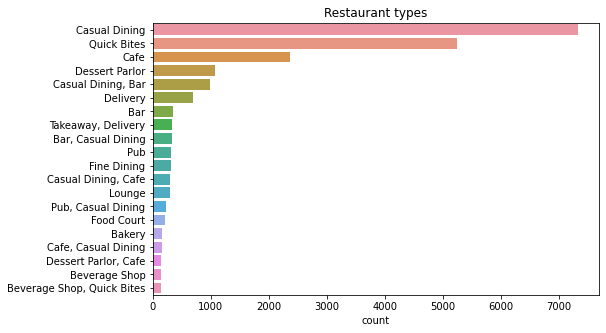

In [62]:
plt.figure(figsize=(8,5))
restro=df['rest_type'].value_counts()[:20]
sns.barplot(restro,restro.index)
plt.title("Restaurant types")
plt.xlabel("count")

### Convert the online catogerical variable into numerical format 

In [63]:
df.online_order[df.online_order=='Yes']=1
df.online_order[df.online_order=='No']=0

In [64]:
df.online_order.value_counts()

1    16378
0     6870
Name: online_order, dtype: int64

In [65]:
df.online_order=pd.to_numeric(df.online_order)

### Changing the string categories into int categories

In [66]:
df.book_table[df.book_table=='Yes']=1
df.book_table[df.book_table=='No']=0

In [67]:
df.book_table.value_counts()

0    17191
1     6057
Name: book_table, dtype: int64

In [68]:
df.describe(include = "all")

,address,name,online_order,book_table,rate,votes,location,rest_type,dish_liked,cuisines,cost,reviews_list,menu_item,type,city
count,23248,23248,23248.000000,23248.0,23248.000000,23248.000000,23248,23248,23248,23248,23248.000000,23248,23248,23248,23248
unique,4379,3157,NaN,2.0,NaN,NaN,88,73,5194,1681,NaN,14075,5048,7,30
top,"The Ritz-Carlton, 99, Residency Road, Bangalore",Onesta,NaN,0.0,NaN,NaN,Koramangala 5th Block,Casual Dining,Biryani,North Indian,NaN,[],[],Delivery,BTM
freq,51,85,NaN,17191.0,NaN,NaN,1776,7326,179,1152,NaN,174,16449,10657,1417
mean,NaN,NaN,0.704491,NaN,3.905781,605.461674,NaN,NaN,NaN,NaN,753.500946,NaN,NaN,NaN,NaN
std,NaN,NaN,0.456281,NaN,0.426153,1113.706789,NaN,NaN,NaN,NaN,520.472169,NaN,NaN,NaN,NaN
min,NaN,NaN,0.000000,NaN,1.800000,0.000000,NaN,NaN,NaN,NaN,40.000000,NaN,NaN,NaN,NaN
25%,NaN,NaN,0.000000,NaN,3.800000,104.000000,NaN,NaN,NaN,NaN,400.000000,NaN,NaN,NaN,NaN
50%,NaN,NaN,1.000000,NaN,4.000000,225.000000,NaN,NaN,NaN,NaN,600.000000,NaN,NaN,NaN,NaN
75%,NaN,NaN,1.000000,NaN,4.200000,597.000000,NaN,NaN,NaN,NaN,1000.000000,NaN,NaN,NaN,NaN


### Insite

1.There are 4379 unique restaurant names, of which Onesta has the highest occurrence  (85)
2.The most common restaurant type is "Casual Dining" (7326 occurrences)
3.The most common listed type is Delivery (10657)
  Biryani is the most popular dish, but we can't be sure about this as dish_liked is missing over   half its data. 
4.There are 1681 unique levels in the cuisines column, this is because restaurants are             categorised under many different combinations of cuisines
5.Most popular cuisine  is North indian. It shows how Banglorians love north indian foods.  
6.Average cost for two at Bangalore restaurants is Rs 753 and there is very high variance           (standard deviation Rs 520)
7.Average number of votes per restaurant is 605. and here too there is high variance.
  (standard deviation Rs 1113)
8.Majority of restaurants allow online ordering but don't allow online table booking
9.menu_item, reviews_list also contains many empty lists.


### Label encode the categorical variable to make it easier to build Model

In [69]:
#from sklearn.preprocessing import LableEncoder
#le= LabelEncoder()
from sklearn import preprocessing
le = preprocessing.LabelEncoder()

In [70]:
df.location=le.fit_transform(df.location)
df.rest_type=le.fit_transform(df.rest_type)
df.cuisines=le.fit_transform(df.cuisines)
df.menu_item=le.fit_transform(df.menu_item)

In [71]:
df.head()

,address,name,online_order,book_table,rate,votes,location,rest_type,dish_liked,cuisines,cost,reviews_list,menu_item,type,city
0,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,1,1,4.1,775,1,20,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...",1386,800.0,"[('Rated 4.0', 'RATED\n A beautiful place to ...",5047,Buffet,Banashankari
1,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,1,0,4.1,787,1,20,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...",594,800.0,"[('Rated 4.0', 'RATED\n Had been here for din...",5047,Buffet,Banashankari
2,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,1,0,3.8,918,1,16,"Churros, Cannelloni, Minestrone Soup, Hot Choc...",484,800.0,"[('Rated 3.0', ""RATED\n Ambience is not that ...",5047,Buffet,Banashankari
3,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,0,0,3.7,88,1,62,Masala Dosa,1587,300.0,"[('Rated 4.0', ""RATED\n Great food and proper...",5047,Buffet,Banashankari
4,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,0,0,3.8,166,4,20,"Panipuri, Gol Gappe",1406,600.0,"[('Rated 4.0', 'RATED\n Very good restaurant ...",5047,Buffet,Banashankari


In [72]:
my_data=df.iloc[:,[2,3,4,5,6,7,9,10,12]]
my_data.to_csv("zomato_df.csv")

In [73]:
x=df.iloc[:,[2,3,5,6,7,9,10,12]]
x.head()

,online_order,book_table,votes,location,rest_type,cuisines,cost,menu_item
0,1,1,775,1,20,1386,800.0,5047
1,1,0,787,1,20,594,800.0,5047
2,1,0,918,1,16,484,800.0,5047
3,0,0,88,1,62,1587,300.0,5047
4,0,0,166,4,20,1406,600.0,5047


In [74]:
y=df['rate'].values.reshape(-1,1)
y.ravel()

array([4.1, 4.1, 3.8, ..., 2.8, 2.5, 4.3])

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001627D142148>,
      dtype=object)

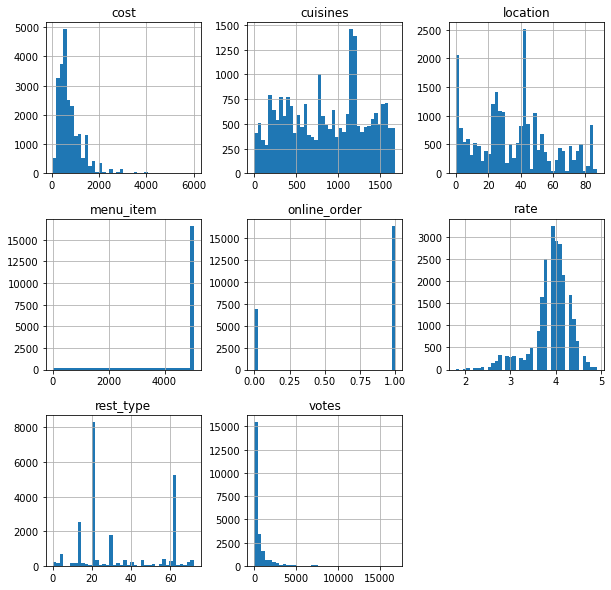

In [75]:
df.hist(bins=40,figsize=(10,10))

### .heatmap()

For better insight i will plot heatmap.

The Big colorful picture below which is called Heatmap helps us to understand how features are correlated to each other. Postive sign implies postive correlation between two features whereas Negative sign implies negative correlation between two features.

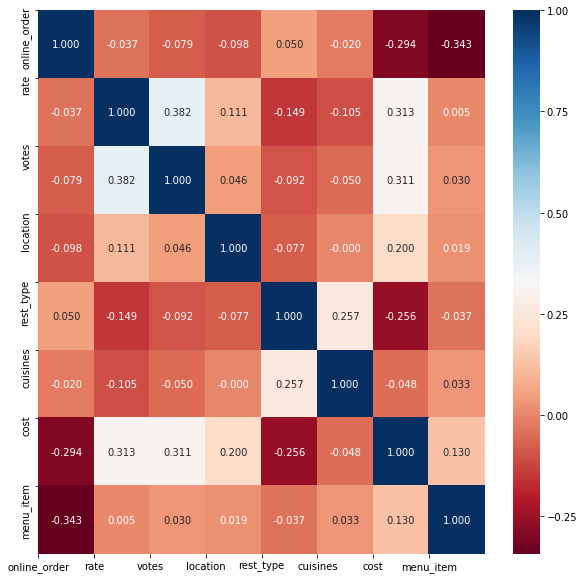

In [76]:
corr = df.corr()
#Plot figsize
fig, ax = plt.subplots(figsize=(10, 10))
#Generate Heat Map, allow annotations and place floats in map
sns.heatmap(corr, cmap='RdBu', annot=True, fmt=".3f")
#Apply xticks
plt.xticks(range(len(corr.columns)), corr.columns);
#Apply yticks
plt.yticks(range(len(corr.columns)), corr.columns)
#show plot
plt.show()


### One Visualization to Rule Them All
We will perform analysis on the training data. The relationship between the features found in the training data is observed. In this way, inference about the properties can be made.

### sns.pairplot
Seaborn Pairplot uses to get the relation between each and every variable present in Pandas DataFrame. It works like a seaborn scatter plot but it plot only two variables plot and sns paiplot plot the pairwise plot of multiple features/variable in a grid format.

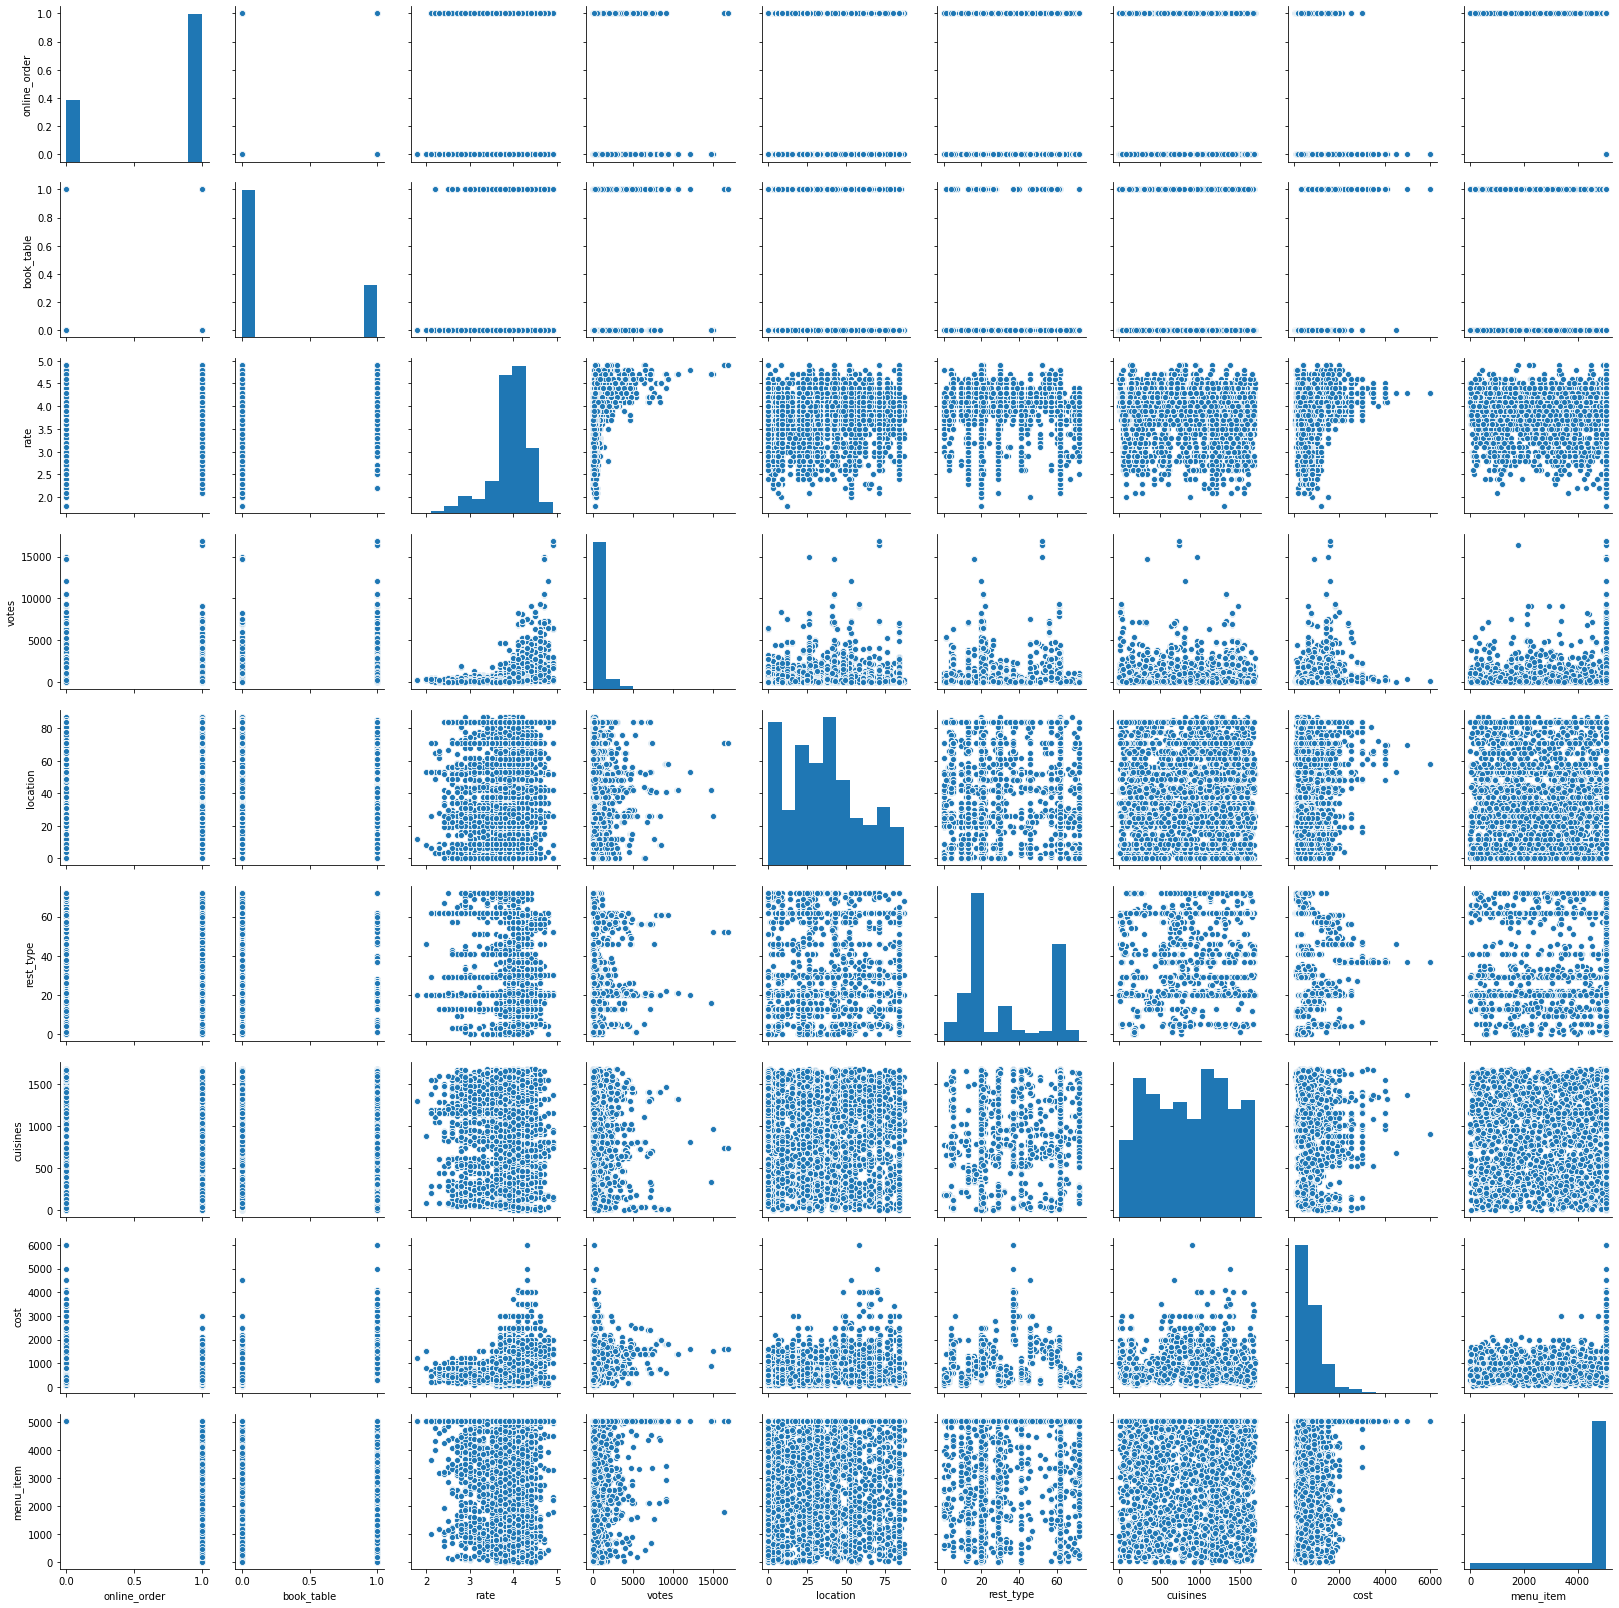

In [77]:
sns.pairplot(df)
plt.show()

In [78]:
# splitting the data set into train and test
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.3, random_state=42)

### Stratified Sampling

This is a sampling technique that is best used when a statistical population can easily be broken down into distinctive sub-groups.Then samples are taken from each sub-groups based on the ratio of the sub groups size to the total population.

In [79]:
print(f"Shape of X_train: {x_train.shape}\nShape of X_test: {x_test.shape}\nShape of y_train: {y_train.shape}\nShape of y_test: {y_test.shape}\n")

Shape of X_train: (16273, 8)
Shape of X_test: (6975, 8)
Shape of y_train: (16273, 1)
Shape of y_test: (6975, 1)



In [80]:
x.head(5)

,online_order,book_table,votes,location,rest_type,cuisines,cost,menu_item
0,1,1,775,1,20,1386,800.0,5047
1,1,0,787,1,20,594,800.0,5047
2,1,0,918,1,16,484,800.0,5047
3,0,0,88,1,62,1587,300.0,5047
4,0,0,166,4,20,1406,600.0,5047


In [81]:
#we will distribute the sample in test and train data so that no of zeros and ones could be same
from sklearn.model_selection import StratifiedShuffleSplit
split = StratifiedShuffleSplit(n_splits=1,test_size=0.2,random_state=42)
split.get_n_splits(x, y)
for train_index,test_index in split.split(df,df[ 'online_order']):
    print("TRAIN:", train_index, "\nTEST:", test_index)
   
    strat_X_train = df.loc[train_index]
    strat_X_test = df.loc[test_index]

TRAIN: [ 8728  5525 14052 ...  3063  6701 20478] 
TEST: [ 1274  3356 22025 ...  5305  5077 13001]


### Linear Regression

In [82]:
from sklearn.metrics import r2_score
lr_model= LinearRegression()
lr_model.fit(x_train,y_train)
y_pred= lr_model.predict(x_test)
r2_score (y_test,y_pred)

0.22330334842254618

### DecisionTreeRegressor

In [83]:
# Fitting the Decision Tree Regression Model to the dataset
from sklearn.tree import DecisionTreeRegressor
regression_dt = DecisionTreeRegressor(random_state = 0)
regression_dt.fit(x_train, y_train)
y_pred=regression_dt.predict(x_test)
r2_score(y_test, y_pred)

0.8546376884400715

### Random Forest

In [84]:
from sklearn.ensemble import RandomForestRegressor
rf_model=RandomForestRegressor(n_estimators=700,random_state=42)
rf_model.fit(x_train,y_train)
y_predict=rf_model.predict(x_test)
r2_score(y_test,y_predict.ravel())

0.9066741298164033

### ExtraTreeRegressor

In [85]:
from sklearn.tree import ExtraTreeRegressor
extratree_model=ExtraTreeRegressor(random_state=42)
extratree_model.fit(x_train,y_train)
y_predict=extratree_model.predict(x_test)
r2_score(y_test,y_predict.ravel())

0.8338711690187534

### Result

So from here we can conclude that out of multiple models RandomForestRegressor model is working well with 90.66% accuracy. which is a very good accuracy.

In [86]:
# Using pickle we will save our model so that we can use it further
import pickle
pickle.dump(extratree_model,open('model.pkl','wb'))
model=pickle.load(open('model.pkl','rb'))